In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import nltk

In [2]:
# Reading datasets
df = pd.read_csv('Emotion_final.csv')
df

,Text,Emotion,polarity,subjectivity
0,i didnt feel humiliated,sadness,0.0,0.0
1,i can go from feeling so hopeless to so damned...,sadness,0.0,0.0
2,im grabbing a minute to post i feel greedy wrong,anger,-0.5,0.9
3,i am ever feeling nostalgic about the fireplac...,love,-0.5,1.0
4,i am feeling grouchy,anger,0.0,0.0
...,...,...,...,...
21454,Melissa stared at her friend in dism,fear,0.0,0.0
21455,Successive state elections have seen the gover...,fear,0.0,0.0
21456,Vincent was irritated but not dismay,fear,0.0,0.0
21457,Kendall-Hume turned back to face the dismayed ...,fear,0.0,0.0


In [3]:
print('unique values',df['Emotion'].unique())

unique values ['sadness' 'anger' 'love' 'surprise' 'fear' 'happy']


<Axes: xlabel='Emotion', ylabel='count'>

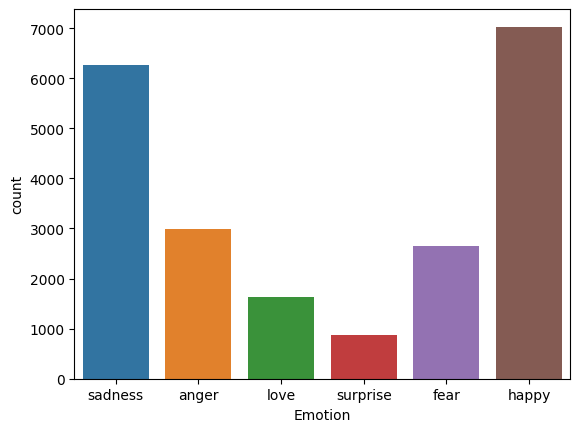

In [4]:
sns.countplot(x = 'Emotion',data=df)

In [5]:
df['Emotion'] = df['Emotion'].map({'sadness':0,'anger':1,'love':2,'surprise':3,'fear':4, 'happy':5})
df

,Text,Emotion,polarity,subjectivity
0,i didnt feel humiliated,0,0.0,0.0
1,i can go from feeling so hopeless to so damned...,0,0.0,0.0
2,im grabbing a minute to post i feel greedy wrong,1,-0.5,0.9
3,i am ever feeling nostalgic about the fireplac...,2,-0.5,1.0
4,i am feeling grouchy,1,0.0,0.0
...,...,...,...,...
21454,Melissa stared at her friend in dism,4,0.0,0.0
21455,Successive state elections have seen the gover...,4,0.0,0.0
21456,Vincent was irritated but not dismay,4,0.0,0.0
21457,Kendall-Hume turned back to face the dismayed ...,4,0.0,0.0


In [6]:
Text=df.Text
Text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [7]:
# Removing the extra charecters and other for appropriate prediction
Text = Text.str.replace('^[a-zA_Z0-9]+',' ')
Text = Text.str.replace('#',' ')
Text = Text.str.replace('-',' ')

Text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMRIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from textblob import TextBlob

# Text for sentiment analysis
t = "this is the worst thing ever"

# Create a TextBlob object
blob = TextBlob(t)

# Perform sentiment analysis


# Print sentiment scores
print(blob.sentiment)


Sentiment(polarity=-1.0, subjectivity=1.0)


In [10]:
# # Run the textblob on the entire dataset
from textblob import TextBlob
res={}
from tqdm.notebook import tqdm
for i,row in tqdm(df.iterrows(), total=len(df)):
    T=row['Text']
    blob=TextBlob(T)
    myid=i
    res[myid]=blob.sentiment

  0%|          | 0/21459 [00:00<?, ?it/s]

In [11]:
res

{0: Sentiment(polarity=0.0, subjectivity=0.0),
 1: Sentiment(polarity=0.0, subjectivity=0.0),
 2: Sentiment(polarity=-0.5, subjectivity=0.9),
 3: Sentiment(polarity=-0.5, subjectivity=1.0),
 4: Sentiment(polarity=0.0, subjectivity=0.0),
 5: Sentiment(polarity=0.00416666666666667, subjectivity=0.662962962962963),
 6: Sentiment(polarity=0.25, subjectivity=1.0),
 7: Sentiment(polarity=-0.15000000000000002, subjectivity=0.44999999999999996),
 8: Sentiment(polarity=0.4000000000000001, subjectivity=0.9),
 9: Sentiment(polarity=0.0, subjectivity=0.5),
 10: Sentiment(polarity=-0.3125, subjectivity=0.6875),
 11: Sentiment(polarity=0.0, subjectivity=0.13333333333333333),
 12: Sentiment(polarity=0.0, subjectivity=0.0),
 13: Sentiment(polarity=0.0, subjectivity=0.3),
 14: Sentiment(polarity=0.07250000000000001, subjectivity=0.8),
 15: Sentiment(polarity=0.0, subjectivity=0.0),
 16: Sentiment(polarity=0.2, subjectivity=0.2),
 17: Sentiment(polarity=-0.08333333333333333, subjectivity=0.8333333333333

In [12]:
blobs=pd.DataFrame(res).T
blobs

,0,1
0,0.0,0.0
1,0.0,0.0
2,-0.5,0.9
3,-0.5,1.0
4,0.0,0.0
...,...,...
21454,0.0,0.0
21455,0.0,0.0
21456,0.0,0.0
21457,0.0,0.0


In [13]:
len(df)

21459

In [14]:
df

,Text,Emotion,polarity,subjectivity
0,i didnt feel humiliated,0,0.0,0.0
1,i can go from feeling so hopeless to so damned...,0,0.0,0.0
2,im grabbing a minute to post i feel greedy wrong,1,-0.5,0.9
3,i am ever feeling nostalgic about the fireplac...,2,-0.5,1.0
4,i am feeling grouchy,1,0.0,0.0
...,...,...,...,...
21454,Melissa stared at her friend in dism,4,0.0,0.0
21455,Successive state elections have seen the gover...,4,0.0,0.0
21456,Vincent was irritated but not dismay,4,0.0,0.0
21457,Kendall-Hume turned back to face the dismayed ...,4,0.0,0.0


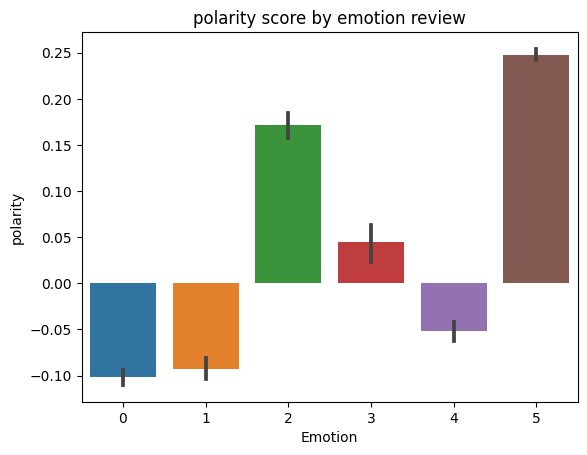

In [15]:
ax=sns.barplot(data=df, x='Emotion', y='polarity')
ax.set_title('polarity score by emotion review')
plt.show()

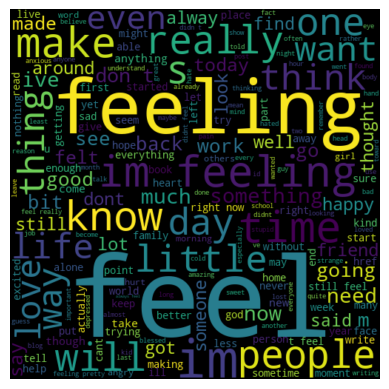

In [16]:
## Word Cloud

from wordcloud import WordCloud
allwords=' '.join([str(i) for i in df['Text']])
wordCloud=WordCloud(width=500, height=500,random_state=21, max_font_size=150).generate(allwords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
df

,Text,Emotion,polarity,subjectivity
0,i didnt feel humiliated,0,0.0,0.0
1,i can go from feeling so hopeless to so damned...,0,0.0,0.0
2,im grabbing a minute to post i feel greedy wrong,1,-0.5,0.9
3,i am ever feeling nostalgic about the fireplac...,2,-0.5,1.0
4,i am feeling grouchy,1,0.0,0.0
...,...,...,...,...
21454,Melissa stared at her friend in dism,4,0.0,0.0
21455,Successive state elections have seen the gover...,4,0.0,0.0
21456,Vincent was irritated but not dismay,4,0.0,0.0
21457,Kendall-Hume turned back to face the dismayed ...,4,0.0,0.0


In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(
    df.Text,
    df.Emotion,
    test_size=0.2,
    random_state=2022,
    stratify=df.Emotion
)

In [19]:
X_train.shape

(17167,)

In [20]:
X_test.shape

(4292,)

Models with TF-IDF

In [21]:
### Naive Bayes with TF-IDF

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('MNB',MultinomialNB())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77      1253
           1       0.95      0.17      0.28       599
           2       1.00      0.02      0.04       328
           3       0.00      0.00      0.00       176
           4       0.95      0.17      0.29       530
           5       0.57      0.98      0.73      1406

    accuracy                           0.63      4292
   macro avg       0.69      0.37      0.35      4292
weighted avg       0.71      0.63      0.54      4292



d:\ML sessions RealTime Projects\Major Project\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ML sessions RealTime Projects\Major Project\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ML sessions RealTime Projects\Major Project\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [22]:
### K-NN with TF-IDF

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('KNN',KNeighborsClassifier())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1253
           1       0.69      0.61      0.64       599
           2       0.66      0.49      0.56       328
           3       0.63      0.41      0.50       176
           4       0.72      0.57      0.64       530
           5       0.77      0.76      0.76      1406

    accuracy                           0.70      4292
   macro avg       0.69      0.61      0.64      4292
weighted avg       0.71      0.70      0.70      4292



In [23]:
## RandomForest with TF-IDF
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('RF',RandomForestClassifier())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1253
           1       0.88      0.79      0.83       599
           2       0.87      0.63      0.73       328
           3       0.79      0.64      0.71       176
           4       0.83      0.78      0.81       530
           5       0.81      0.94      0.87      1406

    accuracy                           0.85      4292
   macro avg       0.84      0.78      0.80      4292
weighted avg       0.85      0.85      0.84      4292



In [24]:
## TF-IDF with GradientBoosting Regression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('GB',GradientBoostingClassifier())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1253
           1       0.93      0.70      0.80       599
           2       0.81      0.71      0.76       328
           3       0.76      0.77      0.77       176
           4       0.88      0.74      0.80       530
           5       0.72      0.95      0.82      1406

    accuracy                           0.82      4292
   macro avg       0.84      0.78      0.80      4292
weighted avg       0.84      0.82      0.82      4292



In [25]:
## TF-IDF with SVM Regression

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('svm',SVC(kernel='sigmoid'))
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1253
           1       0.89      0.82      0.86       599
           2       0.85      0.70      0.76       328
           3       0.81      0.68      0.74       176
           4       0.84      0.84      0.84       530
           5       0.87      0.94      0.90      1406

    accuracy                           0.87      4292
   macro avg       0.86      0.81      0.83      4292
weighted avg       0.87      0.87      0.87      4292



In [26]:
## TF-IDF with Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('LR',LogisticRegression())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1253
           1       0.90      0.77      0.83       599
           2       0.85      0.57      0.68       328
           3       0.87      0.54      0.67       176
           4       0.88      0.78      0.83       530
           5       0.81      0.96      0.88      1406

    accuracy                           0.85      4292
   macro avg       0.86      0.76      0.80      4292
weighted avg       0.86      0.85      0.85      4292



d:\ML sessions RealTime Projects\Major Project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models trained-->TF-IDF on Pre-Processed Text

In [27]:

import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [28]:
df['preprocessed_txt']=df['Text'].apply(preprocess)

In [29]:
df.head()

,Text,Emotion,polarity,subjectivity,preprocessed_txt
0,i didnt feel humiliated,0,0.0,0.0,not feel humiliate
1,i can go from feeling so hopeless to so damned...,0,0.0,0.0,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,1,-0.5,0.9,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,-0.5,1.0,feel nostalgic fireplace know property
4,i am feeling grouchy,1,0.0,0.0,feel grouchy


In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(
    df.preprocessed_txt,
    df.Emotion,
    test_size=0.2,
    random_state=2022,
    stratify=df.Emotion
)

In [31]:
### Naive Bayes with TF-IDF and preprocessed text

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('MNB',MultinomialNB())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1253
           1       0.93      0.37      0.53       599
           2       1.00      0.08      0.14       328
           3       1.00      0.02      0.03       176
           4       0.92      0.36      0.52       530
           5       0.63      0.97      0.76      1406

    accuracy                           0.69      4292
   macro avg       0.86      0.45      0.46      4292
weighted avg       0.77      0.69      0.63      4292



In [32]:
### K-NN with TF-IDF and preprocessed text

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('KNN',KNeighborsClassifier())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1253
           1       0.78      0.75      0.76       599
           2       0.69      0.56      0.62       328
           3       0.66      0.55      0.60       176
           4       0.83      0.67      0.74       530
           5       0.83      0.83      0.83      1406

    accuracy                           0.78      4292
   macro avg       0.76      0.71      0.73      4292
weighted avg       0.78      0.78      0.78      4292



In [33]:
## RandomForest with TF-IDF and preprocessed txt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('RF',RandomForestClassifier())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1253
           1       0.84      0.85      0.85       599
           2       0.84      0.66      0.74       328
           3       0.77      0.70      0.73       176
           4       0.83      0.81      0.82       530
           5       0.86      0.92      0.89      1406

    accuracy                           0.86      4292
   macro avg       0.84      0.80      0.82      4292
weighted avg       0.86      0.86      0.86      4292



In [34]:
## TF-IDF with Logistic Regression with preprocessed txt

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('LR',LogisticRegression())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1253
           1       0.90      0.82      0.86       599
           2       0.83      0.56      0.67       328
           3       0.86      0.55      0.67       176
           4       0.87      0.78      0.82       530
           5       0.82      0.94      0.87      1406

    accuracy                           0.85      4292
   macro avg       0.86      0.76      0.80      4292
weighted avg       0.85      0.85      0.85      4292



d:\ML sessions RealTime Projects\Major Project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
## TF-IDF with SVM Regression with pre-processed text

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('LR',SVC(kernel='sigmoid'))
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1253
           1       0.88      0.85      0.86       599
           2       0.83      0.66      0.74       328
           3       0.76      0.69      0.72       176
           4       0.84      0.82      0.83       530
           5       0.86      0.92      0.89      1406

    accuracy                           0.86      4292
   macro avg       0.84      0.81      0.82      4292
weighted avg       0.86      0.86      0.86      4292



In [36]:
## TF-IDF with GradientBoosting Regression with preprocessed txt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('GB',GradientBoostingClassifier())
])

clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1253
           1       0.91      0.69      0.79       599
           2       0.80      0.60      0.69       328
           3       0.71      0.80      0.75       176
           4       0.87      0.71      0.78       530
           5       0.69      0.92      0.79      1406

    accuracy                           0.79      4292
   macro avg       0.81      0.75      0.77      4292
weighted avg       0.81      0.79      0.79      4292



Models trained-->Gensim on Pre-Processed Text 

In [37]:
# Implementing Gensim

import gensim.downloader as api
wv=api.load('word2vec-google-news-300')

In [38]:
## Implementing the gensim in the whole data_set
import spacy 
nlp=spacy.load("en_core_web_lg")

def preprocess_and_vectorize(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        filtered_tokens.append(token.lemma_)
    return wv.get_mean_vector(filtered_tokens)

In [39]:
df['vector']=df['Text'].apply(lambda text: preprocess_and_vectorize(text))

In [40]:
df

,Text,Emotion,polarity,subjectivity,preprocessed_txt,vector
0,i didnt feel humiliated,0,0.0,0.0,not feel humiliate,"[-0.004404286, 0.016211705, 0.036602724, -0.00..."
1,i can go from feeling so hopeless to so damned...,0,0.0,0.0,feel hopeless damned hopeful care awake,"[0.016337194, 0.019051595, -0.0024724957, 0.01..."
2,im grabbing a minute to post i feel greedy wrong,1,-0.5,0.9,m grab minute post feel greedy wrong,"[0.0035510415, 0.019274954, -0.042388447, 0.01..."
3,i am ever feeling nostalgic about the fireplac...,2,-0.5,1.0,feel nostalgic fireplace know property,"[0.046946052, -0.00384709, 0.0033272977, 0.023..."
4,i am feeling grouchy,1,0.0,0.0,feel grouchy,"[0.029906422, 0.04318909, -0.04451336, -0.0027..."
...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,0.0,0.0,Melissa stare friend dism,"[0.03200971, -0.057577524, 0.018192675, 0.0376..."
21455,Successive state elections have seen the gover...,4,0.0,0.0,successive state election see govern party pum...,"[-0.009326119, -0.0017861705, 0.0044990145, -0..."
21456,Vincent was irritated but not dismay,4,0.0,0.0,Vincent irritated dismay,"[0.041439537, 0.050213188, 0.01652416, -0.0158..."
21457,Kendall-Hume turned back to face the dismayed ...,4,0.0,0.0,Kendall Hume turn face dismayed coup,"[0.011050618, 0.045448095, 0.02805025, -0.0112..."


In [41]:
## Train-Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(
    df.vector.values,
    df.Emotion,
    test_size=0.2,
    random_state=2022,
    stratify=df.Emotion
)

In [42]:
## Reshaping the X_train and X_test so as to fit for models

X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)
print(X_test_2d.shape)
print(X_train_2d.shape)

(4292, 300)
(17167, 300)


In [43]:
## Gensim with GradientBoosting Regression with preprocessed txt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf=GradientBoostingClassifier()
clf.fit(X_train_2d,Y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1253
           1       0.64      0.41      0.50       599
           2       0.61      0.22      0.32       328
           3       0.60      0.31      0.41       176
           4       0.67      0.46      0.54       530
           5       0.63      0.83      0.71      1406

    accuracy                           0.63      4292
   macro avg       0.63      0.49      0.53      4292
weighted avg       0.63      0.63      0.61      4292



In [44]:
## Gensim with K-NN Regression with preprocessed txt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf=KNeighborsClassifier()
clf.fit(X_train_2d,Y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.69      0.58      1253
           1       0.41      0.42      0.42       599
           2       0.30      0.22      0.25       328
           3       0.36      0.16      0.23       176
           4       0.47      0.34      0.40       530
           5       0.63      0.57      0.60      1406

    accuracy                           0.51      4292
   macro avg       0.45      0.40      0.41      4292
weighted avg       0.51      0.51      0.50      4292



In [45]:
## Gensim with Logistic Regression with preprocessed txt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf=LogisticRegression()
clf.fit(X_train_2d,Y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1253
           1       0.69      0.46      0.55       599
           2       0.67      0.20      0.30       328
           3       0.75      0.24      0.36       176
           4       0.70      0.49      0.58       530
           5       0.65      0.86      0.74      1406

    accuracy                           0.66      4292
   macro avg       0.68      0.50      0.54      4292
weighted avg       0.66      0.66      0.63      4292



d:\ML sessions RealTime Projects\Major Project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
## Gensim with Random-Forest Regression with preprocessed txt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf=RandomForestClassifier()
clf.fit(X_train_2d,Y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.75      0.62      1253
           1       0.72      0.21      0.32       599
           2       0.71      0.05      0.10       328
           3       0.30      0.02      0.03       176
           4       0.80      0.19      0.31       530
           5       0.56      0.86      0.68      1406

    accuracy                           0.56      4292
   macro avg       0.60      0.35      0.34      4292
weighted avg       0.60      0.56      0.49      4292



In [47]:
## Gensim with Naive-Bayes Regression with preprocessed txt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf=GaussianNB()
clf.fit(X_train_2d,Y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.56      1253
           1       0.50      0.43      0.46       599
           2       0.21      0.57      0.31       328
           3       0.33      0.51      0.40       176
           4       0.52      0.47      0.49       530
           5       0.67      0.60      0.63      1406

    accuracy                           0.52      4292
   macro avg       0.49      0.51      0.48      4292
weighted avg       0.58      0.52      0.54      4292



In [48]:
## Gensim with SVM Regression with preprocessed txt

from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf=SVC(kernel='sigmoid')
clf.fit(X_train_2d,Y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.69      0.57      1253
           1       0.64      0.26      0.37       599
           2       0.51      0.17      0.26       328
           3       0.65      0.15      0.24       176
           4       0.58      0.34      0.42       530
           5       0.56      0.73      0.63      1406

    accuracy                           0.54      4292
   macro avg       0.57      0.39      0.42      4292
weighted avg       0.55      0.54      0.51      4292



In [49]:
df

,Text,Emotion,polarity,subjectivity,preprocessed_txt,vector
0,i didnt feel humiliated,0,0.0,0.0,not feel humiliate,"[-0.004404286, 0.016211705, 0.036602724, -0.00..."
1,i can go from feeling so hopeless to so damned...,0,0.0,0.0,feel hopeless damned hopeful care awake,"[0.016337194, 0.019051595, -0.0024724957, 0.01..."
2,im grabbing a minute to post i feel greedy wrong,1,-0.5,0.9,m grab minute post feel greedy wrong,"[0.0035510415, 0.019274954, -0.042388447, 0.01..."
3,i am ever feeling nostalgic about the fireplac...,2,-0.5,1.0,feel nostalgic fireplace know property,"[0.046946052, -0.00384709, 0.0033272977, 0.023..."
4,i am feeling grouchy,1,0.0,0.0,feel grouchy,"[0.029906422, 0.04318909, -0.04451336, -0.0027..."
...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,0.0,0.0,Melissa stare friend dism,"[0.03200971, -0.057577524, 0.018192675, 0.0376..."
21455,Successive state elections have seen the gover...,4,0.0,0.0,successive state election see govern party pum...,"[-0.009326119, -0.0017861705, 0.0044990145, -0..."
21456,Vincent was irritated but not dismay,4,0.0,0.0,Vincent irritated dismay,"[0.041439537, 0.050213188, 0.01652416, -0.0158..."
21457,Kendall-Hume turned back to face the dismayed ...,4,0.0,0.0,Kendall Hume turn face dismayed coup,"[0.011050618, 0.045448095, 0.02805025, -0.0112..."
